# House Price prediction Project

**Efforts by Rhythm Suthar, Manipal University Jaipur**

Student_id: CT_CSI_DS_2919

Check out my submission at : https://www.kaggle.com/work/collections/14152789

# Introduction

Predicting house prices is a crucial aspect of the real estate industry. Accurate predictions can benefit various stakeholders, including buyers, sellers, investors, and real estate professionals, by providing insights into market trends and helping make informed decisions. This project aims to develop a predictive model for house prices using advanced machine learning techniques.

In this project, I have leveraged three different machine learning models to predict house prices based on various features of the properties. The models I used are:

Support Vector Regressor (SVR)
Random Forest Regressor
Gradient Boosting Regressor (GBR)

**Objective**
The primary objective of this project is to develop and evaluate different regression models to predict house prices as accurately as possible. By testing these models on unseen data, we aim to determine which model performs the best and can be used for reliable house price predictions.

**Methodology**
The project follows these steps:

Data Preprocessing:

Handling missing values using imputation techniques.
Encoding categorical variables using OneHotEncoder.
Applying polynomial features transformation to capture non-linear relationships.
Scaling the features to standardize the data.
Model Training:

Three different regression models (SVR, Random Forest, and GBR) are trained on the preprocessed training data.
Hyperparameter tuning is performed using GridSearchCV to find the optimal parameters for each model.
Model Evaluation:

The performance of each model is evaluated on unseen test data.
Metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) are used to compare the models' performance.

**Prediction and Submission:**

Predictions are made using the best-performing model.
The results are formatted and saved as a CSV file for submission.
Tools and Libraries
The following tools and libraries are used in this project:

Python: The core programming language used for the implementation.
Pandas: For data manipulation and analysis.
NumPy: For numerical operations.
Scikit-learn: For machine learning model implementation and evaluation.
Matplotlib & Seaborn: For data visualization.
Results
After thorough evaluation, I iconcluded the best model among SVR, Random Forest, and GBR for house price prediction. The results demonstrate the effectiveness of machine learning models in predicting complex real-world phenomena such as house prices.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Preprocessing

In [6]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}',type{type(col)} has {missing_count} missing values")

Column 'LotFrontage',type<class 'str'> has 259 missing values
Column 'Alley',type<class 'str'> has 1369 missing values
Column 'MasVnrType',type<class 'str'> has 872 missing values
Column 'MasVnrArea',type<class 'str'> has 8 missing values
Column 'BsmtQual',type<class 'str'> has 37 missing values
Column 'BsmtCond',type<class 'str'> has 37 missing values
Column 'BsmtExposure',type<class 'str'> has 38 missing values
Column 'BsmtFinType1',type<class 'str'> has 37 missing values
Column 'BsmtFinType2',type<class 'str'> has 38 missing values
Column 'Electrical',type<class 'str'> has 1 missing values
Column 'FireplaceQu',type<class 'str'> has 690 missing values
Column 'GarageType',type<class 'str'> has 81 missing values
Column 'GarageYrBlt',type<class 'str'> has 81 missing values
Column 'GarageFinish',type<class 'str'> has 81 missing values
Column 'GarageQual',type<class 'str'> has 81 missing values
Column 'GarageCond',type<class 'str'> has 81 missing values
Column 'PoolQC',type<class 'str'> h

In [7]:
X = df.drop(['Id', 'SalePrice'], axis=1)
y = np.log(df['SalePrice'])

In [8]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [9]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
numerical_data= df[numerical_features]
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


**Preprocessing numerical features**

In [13]:
imputer_num = SimpleImputer(strategy='median')
imputed_numerical_data = imputer_num.fit_transform(numerical_data)
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_features)

In [14]:
imputed_numerical_df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(imputed_numerical_df)
poly_feature_names = poly.get_feature_names_out(numerical_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [16]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(poly_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=poly_feature_names)
scaled_numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea^2,PoolArea MiscVal,PoolArea MoSold,PoolArea YrSold,MiscVal^2,MiscVal MoSold,MiscVal YrSold,MoSold^2,MoSold YrSold,YrSold^2
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.066453,-0.02618,-0.058094,-0.068694,-0.037839,-0.099037,-0.087716,-1.173995,-1.599323,0.138449
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.066453,-0.02618,-0.058094,-0.068694,-0.037839,-0.099037,-0.087716,-0.604242,-0.489881,-0.614625
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.066453,-0.02618,-0.058094,-0.068694,-0.037839,-0.099037,-0.087716,0.915097,0.991527,0.138449
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.066453,-0.02618,-0.058094,-0.068694,-0.037839,-0.099037,-0.087716,-1.173995,-1.600061,-1.367323
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.066453,-0.02618,-0.058094,-0.068694,-0.037839,-0.099037,-0.087716,2.624354,2.101891,0.138449


**Preprocess categorical data**

In [17]:
categorical_data = df[categorical_features]
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputed_categorical_data = imputer_cat.fit_transform(categorical_data)
imputed_categorical_df = pd.DataFrame(imputed_categorical_data, columns=categorical_features)

In [19]:
imputed_categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(imputed_categorical_df)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

C:\Users\RHYTHM\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
encoded_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
processed_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
processed_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X = processed_df

# Exploratory Data Analysis

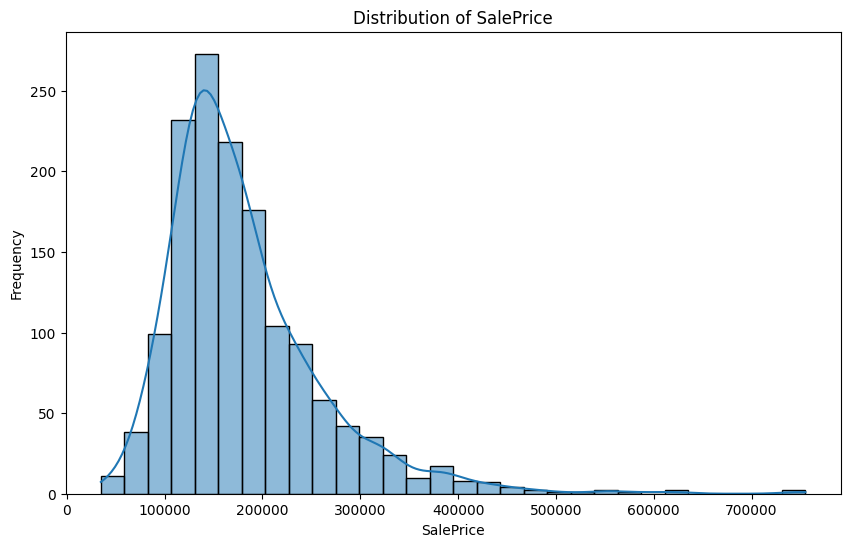

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


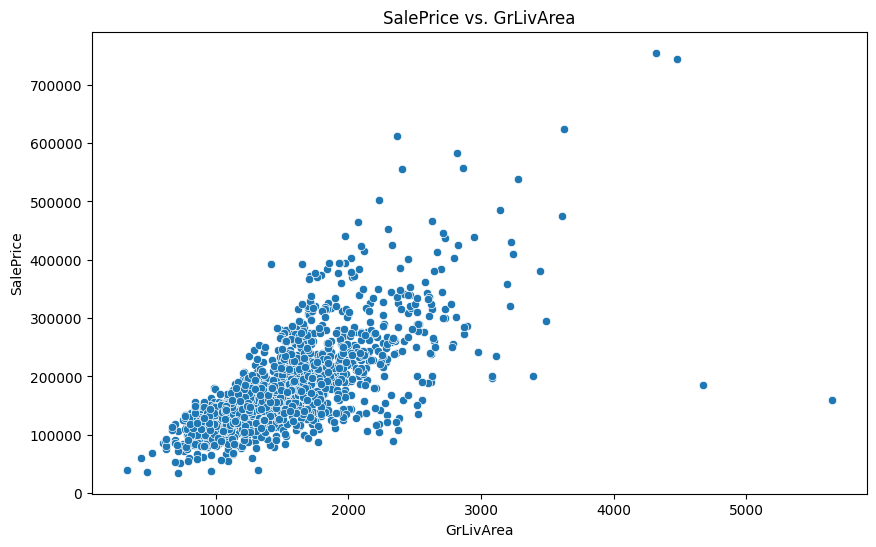

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


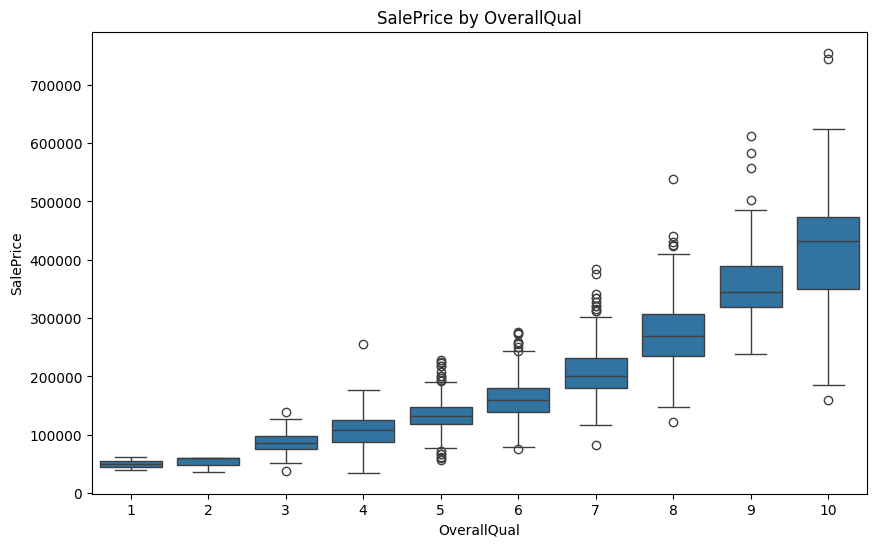

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


# Linear Regression Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [30]:
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))
print()


Linear Regression:
Mean Squared Error: 0.08592529025409551
Mean Absolute Error: 0.1744505335383186
R-squared: 0.5395548454321861



# Random Forest Model

In [31]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [32]:
print("Random Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))
print()

Random Forest:
Mean Squared Error: 0.02032755730132447
Mean Absolute Error: 0.09662552807774351
R-squared: 0.8910713570368379



# SVR Model

In [33]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [34]:
print("Support Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("R-squared:", r2_score(y_test, y_pred_svr))
print()


Support Vector Regression:
Mean Squared Error: 0.03269410699940799
Mean Absolute Error: 0.12273923651044646
R-squared: 0.8248031155171858



# Gradient Boosting Regressor

In [35]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

In [36]:
print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gbr_mse}")
print(f"Mean Absolute Error: {gbr_mae}")
print(f"R-squared: {gbr_r2}")


Gradient Boosting Regressor:
Mean Squared Error: 0.019563925070817646
Mean Absolute Error: 0.09444684096965726
R-squared: 0.8951634090900682


# KNN Regressor

In [37]:
knn_model = KNeighborsRegressor(n_neighbors=5)  

knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

In [38]:
print("K-Nearest Neighbors Regressor:")
print(f"Mean Squared Error: {knn_mse}")
print(f"Mean Absolute Error: {knn_mae}")
print(f"R-squared: {knn_r2}")

K-Nearest Neighbors Regressor:
Mean Squared Error: 0.0322477554091496
Mean Absolute Error: 0.12281935553770473
R-squared: 0.8271949657670988


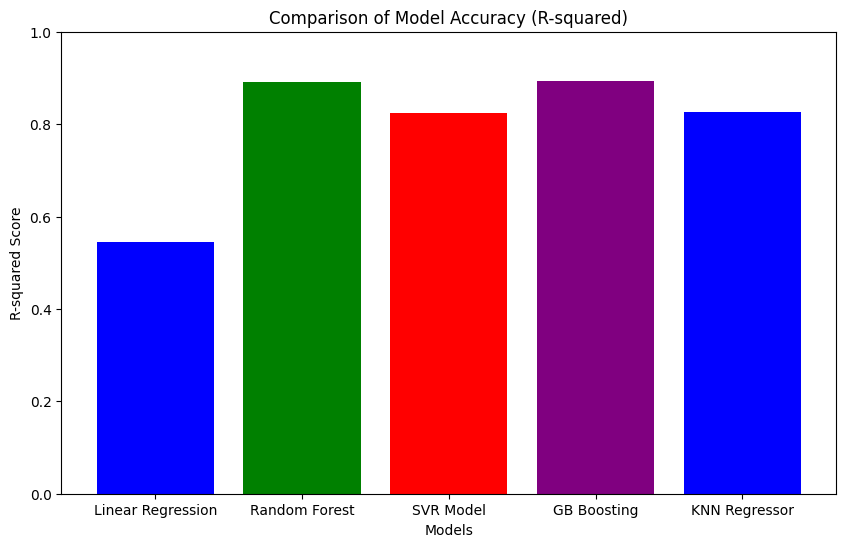

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assume we have the R-squared values for all models
# Replace these values with your actual results
models = ['Linear Regression', 'Random Forest','SVR Model', 'GB Boosting', 'KNN Regressor']
r2_scores = [0.5455, 0.8914,0.8231,0.8944, 0.8267]  # Example R-squared scores

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of Model Accuracy (R-squared)')
plt.ylim(0, 1)  # Assuming R-squared scores range from 0 to 1
plt.show()


**Top 3 models are Random Forest, GB Boosting and SVR therefore we will use that for predictions on test data**

# Working with test data

In [40]:
test_data=pd.read_csv('test.csv')

In [41]:
test_ids = test_data['Id']
test_X = test_data.drop(['Id'], axis=1)

**Preprocess test data**

In [42]:
test_numerical_features = test_X.select_dtypes(include=['int64', 'float64']).columns
test_categorical_features = test_X.select_dtypes(include=['object']).columns

In [45]:
test_cat_data=test_X[test_categorical_features]

In [43]:
test_num_data=test_X[test_numerical_features]
test_num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


Preprocess numerical features

In [46]:
from sklearn.impute import SimpleImputer

# Assuming train_cat_data and test_cat_data are the categorical dataframes from train and test sets respectively.
imputer_cat = SimpleImputer(strategy='most_frequent')

# Fit on train data
train_imputed_categorical_data = imputer_cat.fit_transform(categorical_data)
train_imputed_categorical_df = pd.DataFrame(train_imputed_categorical_data, columns=categorical_features)

# Transform test data
test_imputed_categorical_data = imputer_cat.transform(test_cat_data)
test_imputed_categorical_df = pd.DataFrame(test_imputed_categorical_data, columns=test_categorical_features)


In [47]:
from sklearn.preprocessing import OneHotEncoder

# Fit the encoder on the training data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_encoded_categorical_data = encoder.fit_transform(train_imputed_categorical_df)
train_encoded_categorical_df = pd.DataFrame(train_encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Transform the test data using the fitted encoder
test_encoded_categorical_data = encoder.transform(test_imputed_categorical_df)
test_encoded_categorical_df = pd.DataFrame(test_encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))


C:\Users\RHYTHM\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
imputer_num = SimpleImputer(strategy='median')
test_imputed_numerical_data = imputer_num.fit_transform(test_num_data)
test_imputed_numerical_df = pd.DataFrame(test_imputed_numerical_data, columns=test_numerical_features)

In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
test_poly_features = poly.fit_transform(test_imputed_numerical_df)
test_poly_feature_names = poly.get_feature_names_out(test_numerical_features)
test_poly_df = pd.DataFrame(test_poly_features, columns=test_poly_feature_names)

In [52]:
# Assuming train_numerical_df and test_numerical_df are the numerical dataframes from train and test sets respectively
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled_numerical_data = scaler.fit_transform(poly_df)
test_scaled_numerical_data = scaler.transform(test_poly_df)

# Convert to DataFrame
train_scaled_numerical_df = pd.DataFrame(train_scaled_numerical_data, columns=poly_feature_names)
test_scaled_numerical_df = pd.DataFrame(test_scaled_numerical_data, columns=test_poly_feature_names)

# Combine numerical and categorical data
train_X = pd.concat([train_scaled_numerical_df, train_encoded_categorical_df], axis=1)
test_X = pd.concat([test_scaled_numerical_df, test_encoded_categorical_df], axis=1)


In [53]:
# Assuming the models are already defined and trained as gbr_model, random_forest, svr, etc.
test_preds_gbr = np.exp(gbr_model.predict(test_X))
test_preds_rf = np.exp(random_forest.predict(test_X))
test_preds_svr = np.exp(svr.predict(test_X))

# Evaluate or use predictions as needed


This is what test preds would look like....

In [54]:
test_preds_gbr

array([124112.80337398, 155218.53285162, 176191.28494466, ...,
       172186.92781717, 117051.36672994, 225763.74443237])

**Converting test results of all models to specified csv format for submsission on kaggle competetion**

In [55]:
submission_df = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_preds_rf)),
    'SalePrice': test_preds_rf
})

In [56]:
submission_df

,Id,SalePrice
0,1461,126108.368619
1,1462,151192.389149
2,1463,176919.151003
3,1464,184602.151493
4,1465,199085.171723
...,...,...
1454,2915,94291.261983
1455,2916,88560.265139
1456,2917,166648.391694
1457,2918,116855.660812


In [57]:
submission_df.to_csv('submission.csv', index=False)

In [58]:
submission_df_svr = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_preds_rf)),
    'SalePrice': test_preds_svr
})

In [59]:
submission_df_svr.to_csv('SVR_submission.csv', index=False)

In [60]:
submission_df_gbr = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_preds_rf)),
    'SalePrice': test_preds_gbr
})

In [61]:
submission_df_gbr.to_csv('GBR_submission.csv', index=False)

**On submission, SVR model predictions recieved the best score on Kaggle.**